In [5]:
import globals as gl
from main import main
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
from plot import decor, add_significance_brackets, add_significance_asterisks
import os

import pickle
warnings.filterwarnings("ignore")

%matplotlib inline

plt.close('all')
plt.style.use('default')

fontsize=12


# **Success rate**

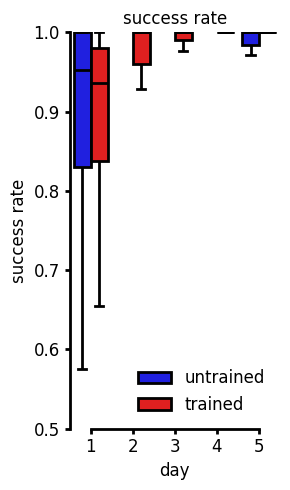

In [55]:
experiment = 'efc2'

metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.tsv'), sep='\t')
success = metrics.groupby(['subNum', 'chordID', 'day', 'chord'])['trialPoint'].mean().reset_index()

fig, axs = plt.subplots(figsize=(3, 5))

sns.boxplot(success, ax=axs, x='day', y='trialPoint', hue='chord', dodge=True, palette=['blue', 'red'], showfliers=False, linewidth=2, linecolor='k')

axs.legend(frameon=False, loc='lower right', ncol=1, fontsize=fontsize)

# axs.set_ylim([.5, 1.1])
# axs.axhline(1, color='k', lw=.8)
# 
axs.spines[['right', 'top']].set_visible(False)
# 

axs.set_ylabel('success rate', fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)
axs.set_title('success rate', fontsize=fontsize)

decor(axs=axs, fontsize=fontsize,  ylim=(.5, 1), ybounds=(.5, 1), xbounds=(0, 4), spines_width=2)

fig.tight_layout()


# **Reaction time**

### **Reaction time by day and repetition**

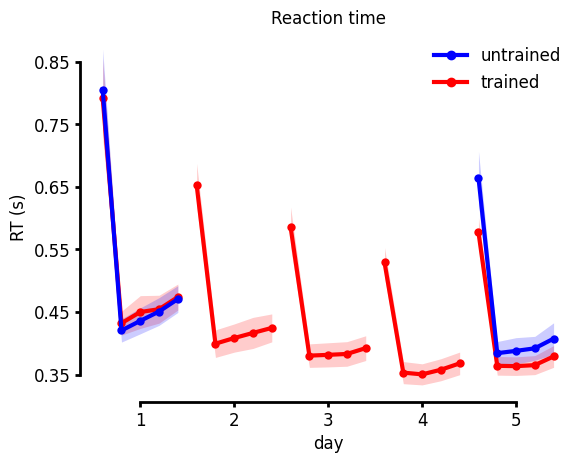

In [59]:
metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.tsv'), sep='\t')

fig, axs = plt.subplots()

offset = 5
metrics['offset'] = metrics['repetition'] + metrics['day'] * offset

metrics = metrics.groupby(['chord', 'participant_id', 'day', 'repetition']).mean(numeric_only='True').reset_index()

sns.lineplot(data=metrics[metrics['chord'] == 'trained'], ax=axs, x='offset', y='RT', hue='day', errorbar='se',
             palette=['red'] * 5, marker='o', lw=3,markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=metrics[metrics['chord'] == 'untrained'], ax=axs, x='offset', y='RT', hue='day', errorbar='se',
         palette=['blue'] * 2, marker='o', markeredgewidth=0, lw=3,err_kws={'linewidth': 0})
axs.set_xticks(np.linspace(8, 28, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained', lw=3),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained', lw=3)       
            ]

axs.legend(handles=custom_handles, loc='upper right', ncol=1, fontsize=fontsize, frameon=False)

axs.set_title('Reaction time', fontsize=fontsize)
axs.set_ylabel('RT (s)', fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)

axs.set_yticks(np.linspace(.35, .85, 6))

decor(axs=axs, fontsize=fontsize, ybounds=(.35, .85), xbounds=(8, 28), spines_width=2)

# **Example force patterns for trained and untrained chords**
In trained chords, isometric forces produced by each finger become more simultaneous after training. Chord execution also becomes faster. Below are two trials taken from the same participant performing chord 91211 (thumb: still, index:extended, middle: flexed, ring: extended, pinkie: exptened) on day 1 (before training) and day 5 (after training).  

Text(0.5, 0.01, 'time (s)')

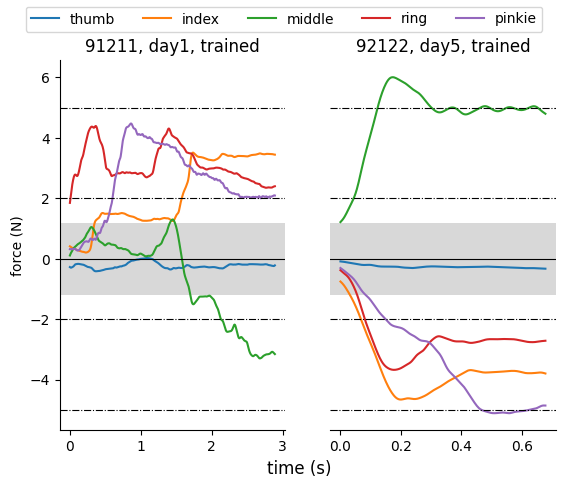

In [20]:
participant_id = 'subj100'
session = 'testing'
day = '1'
ntrial = 1

fig, axs = plt.subplots(1, 2, sharey=True)
_, ax, chordID, day, chord = main('PLOT:force_in_trial', experiment, participant_id, session, day, ntrial=ntrial, fig=fig, axs=axs[0])
ax.set_ylabel('force (N)')
ax.set_title(f'{chordID}, day{day}, {chord}')

ax.spines[['right', 'top']].set_visible(False)

day = '5'
ntrial = 41
_, ax, chordID, day, chord = main('PLOT:force_in_trial', experiment, participant_id, session, day, ntrial=ntrial, fig=fig, axs=axs[1])
ax.set_title(f'{chordID}, day{day}, {chord}')

ax.spines[['right', 'top', 'left']].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

fig.legend(gl.channels['force'], loc='upper center', ncol=5)

fig.supxlabel('time (s)')

In untrained chords, execution improves slightly, but remanins less simultaneous and slower compared to trained chords. Below are two example trials of the untrained chord 21291 (thumb: flexed, index:extended, middle: flexed, ring: still, pinkie: extended) on day 1 and day 5 performed by the same participant.

Text(0.5, 0.01, 'time (s)')

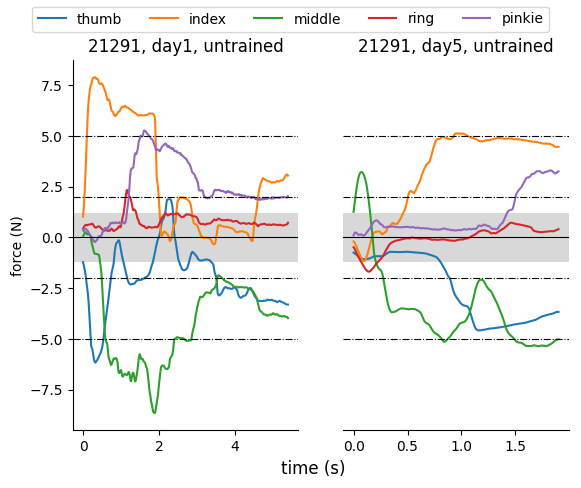

In [10]:
experiment = 'efc2'
participant_id = 'subj100'
session = 'testing'
day = '1'
ntrial = 9

fig, axs = plt.subplots(1, 2, sharey=True)
_, ax, chordID, day, chord = main('PLOT:force_in_trial', experiment, participant_id, session, day, ntrial=ntrial, fig=fig, axs=axs[0])
ax.set_ylabel('force (N)')
ax.set_title(f'{chordID}, day{day}, {chord}')

ax.spines[['right', 'top']].set_visible(False)

day = '5'
ntrial = 34
_, ax, chordID, day, chord = main('PLOT:force_in_trial', experiment, participant_id, session, day, ntrial=ntrial, fig=fig, axs=axs[1])
ax.set_title(f'{chordID}, day{day}, {chord}')

ax.spines[['right', 'top', 'left']].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

fig.legend(gl.channels['force'], loc='upper center', ncol=5)

fig.supxlabel('time (s)')

# **Execution time**

### **Execution time by day**

### **Execution time by day and repetition**

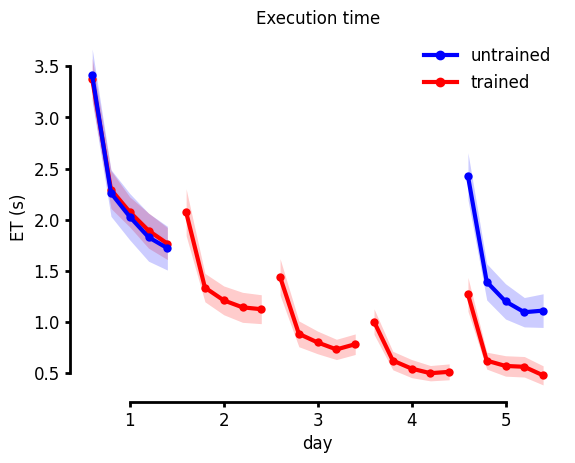

In [129]:
metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.tsv'), sep='\t')

metrics = metrics.groupby(['chord', 'participant_id', 'day', 'repetition']).mean(numeric_only='True').reset_index()

fig, axs = plt.subplots()

offset = 5
metrics['offset'] = metrics['repetition'] + metrics['day'] * offset

sns.lineplot(data=metrics[metrics['chord'] == 'trained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,
             palette=['red'] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=metrics[metrics['chord'] == 'untrained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se',lw=3,
         palette=['blue'] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
axs.set_xticks(np.linspace(8, 28, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained', lw=3),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained', lw=3)       
            ]

axs.legend(handles=custom_handles, loc='upper right', ncol=1, fontsize=fontsize, frameon=False)

axs.set_title('Execution time', fontsize=fontsize)
axs.set_ylabel('ET (s)', fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)

decor(axs=axs, fontsize=fontsize, ybounds=(.5, 3.5), xbounds=(8, 28), spines_width=2)

# **Mean deviation**

### **Mean deviation by day and repetition**

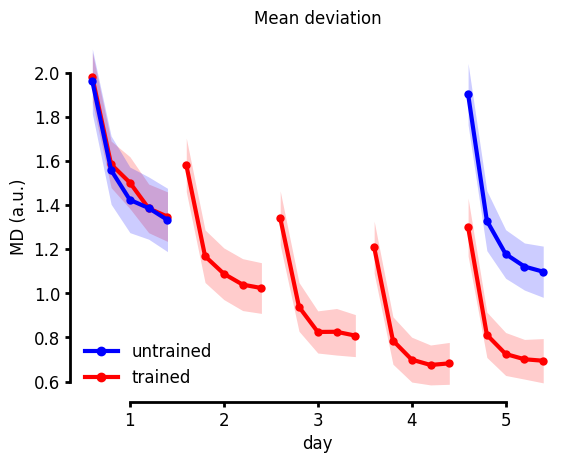

In [63]:
metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.tsv'), sep='\t')

metrics = metrics.groupby(['chord', 'participant_id', 'day', 'repetition']).mean(numeric_only='True').reset_index()

fig, axs = plt.subplots()

offset = 5
metrics['offset'] = metrics['repetition'] + metrics['day'] * offset

sns.lineplot(data=metrics[metrics['chord'] == 'trained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,
             palette=['red'] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=metrics[metrics['chord'] == 'untrained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,
         palette=['blue'] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
axs.set_xticks(np.linspace(8, 28, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained', lw=3),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained', lw=3)
            ]

axs.legend(handles=custom_handles, ncol=1, frameon=False, fontsize=fontsize)

axs.set_title('Mean deviation', fontsize=fontsize)
axs.set_ylabel('MD (a.u.)', fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)

decor(axs=axs, fontsize=fontsize, ybounds=(.6, 2), xbounds=(8, 28), spines_width=2)


# **Cross-correlation**

## **Average inter-finger lag for example chords**

Text(0.5, 0.98, 'Average lag at maximum cross-correlation\nbetween finger pairs (chord: 91211, trained, N=13)')

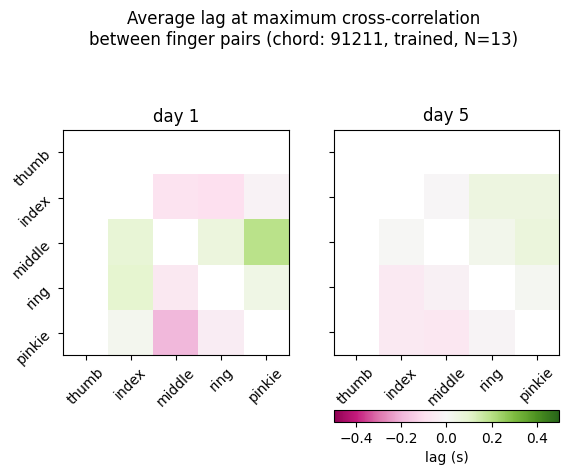

In [64]:
participant_id = gl.participants[experiment]
chordID = 91211
chord = 'trained'

fig, axs = plt.subplots(1, 2, sharey=True)

day = '1'
fig, ax, _ = main('PLOT:xcorr_chord', experiment, participant_id=participant_id,chordID=chordID, chord=chord, day=day, fig=fig, axs=axs[0])
ax.set_title('day 1')

day = '5'
fig, ax, cax = main('PLOT:xcorr_chord', experiment, participant_id=participant_id,chordID=chordID, chord=chord, day=day, fig=fig, axs=axs[1])
ax.set_title('day 5')

cbar = fig.colorbar(cax, ax=ax, orientation='horizontal', location='bottom', fraction=0.046)
cbar.set_label('lag (s)')

fig.suptitle(f'Average lag at maximum cross-correlation\nbetween finger pairs (chord: {chordID}, {chord}, N={len(participant_id)})')

Text(0.5, 0.98, 'Average lag at maximum cross-correlation\nbetween finger pairs (chord: 21291, untrained, N=13)')

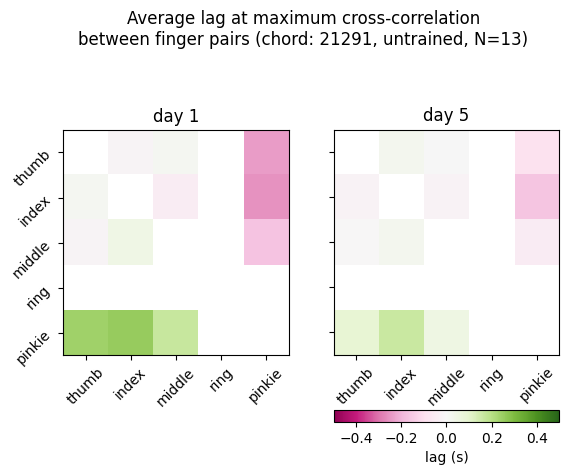

In [65]:
chordID = 21291
chord = 'untrained'

fig, axs = plt.subplots(1, 2, sharey=True)

day = '1'
fig, ax, _ = main('PLOT:xcorr_chord', experiment, participant_id=participant_id,chordID=chordID, chord=chord, day=day, fig=fig, axs=axs[0])
ax.set_title('day 1')

day = '5'
fig, ax, cax = main('PLOT:xcorr_chord', experiment, participant_id=participant_id,chordID=chordID, chord=chord, day=day, fig=fig, axs=axs[1])
ax.set_title('day 5')

cbar = fig.colorbar(cax, ax=ax, orientation='horizontal', location='bottom', fraction=0.046)
cbar.set_label('lag (s)')

fig.suptitle(f'Average lag at maximum cross-correlation\nbetween finger pairs (chord: {chordID}, {chord}, N={len(participant_id)})')

## **Inter-finger lag decreases during training**

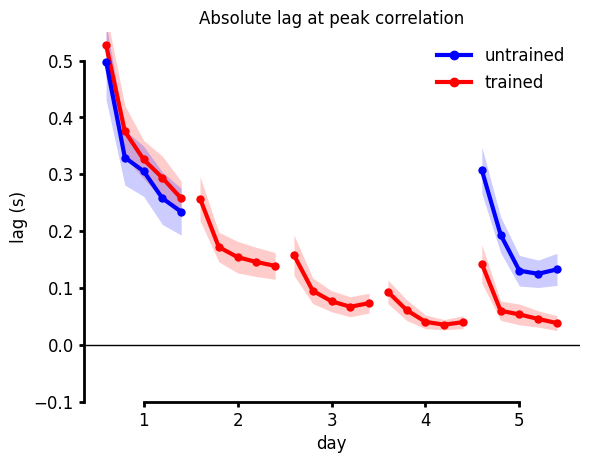

In [67]:
experiment = 'efc2'

tau = pd.read_csv(os.path.join(gl.baseDir, experiment, 'tau.tsv'), sep='\t')

tau = tau.groupby(['chord', 'participant_id', 'day', 'repetition']).mean(numeric_only='True').reset_index()

fig, axs = plt.subplots()

offset = 5
tau['offset'] = tau['repetition'] + tau['day'] * offset

sns.lineplot(data=tau[tau['chord'] == 'trained'], ax=axs, x='offset', y='tauAbs', hue='day', errorbar='se', lw=3,
             palette=['red'] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=tau[tau['chord'] == 'untrained'], ax=axs, x='offset', y='tauAbs', hue='day', errorbar='se', lw=3,
         palette=['blue'] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
# sns.lineplot(data=tau[tau['chord'] == 'trained'], ax=axs, x='offset', y='tauRel', hue='day', errorbar='se', lw=3,
#              palette=[(1, .5, .5)] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
# sns.lineplot(data=tau[tau['chord'] == 'untrained'], ax=axs, x='offset', y='tauRel', hue='day', errorbar='se', lw=3,
#          palette=[(.5, .5, 1)] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
axs.set_xticks(np.linspace(8, 28, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

axs.axhline(y=0, color='k', linestyle='-', linewidth=1)

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained', lw=3),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained', lw=3)
            ]

axs.legend(handles=custom_handles, ncol=1, frameon=False, fontsize=fontsize)

axs.set_title('Absolute lag at peak correlation', fontsize=fontsize)
axs.set_ylabel('lag (s)', fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)

decor(axs=axs, fontsize=fontsize, ylim=(-.1, .55), ybounds=(-.1, .5), xbounds=(8, 28), spines_width=2)

## **Inter-finger lag is not consistent across trials**

If participants employed a consistent chunking or sequencing strategy to achieve the hand configurations required in the task, then the pattern of cross-correlation between fingers should remain stable across trials. To assess this, I calculated the average correlation between cross-correlation patterns observed in different trials on each day. As a comparison, I shuffled the lags measured between paired of fingers and calculated the correlation again using shuffled data (10 permutations). The average correlation between cross-correlation patterns is not significantly higher than the correlation measured using shuffled data. 

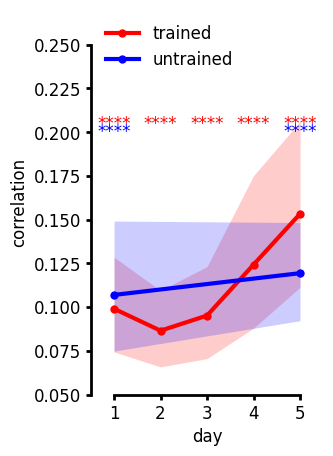

In [2]:
experiment = 'efc2'

corr = pd.read_csv(os.path.join(gl.baseDir, experiment, 'corr.tsv'), sep='\t')

fig, axs = plt.subplots(figsize=(3, 5))

sns.lineplot(data=corr, ax=axs, y='corr', x='day', hue='chord', palette=['red', 'blue'], marker='o', markeredgecolor='none', 
             lw=3, err_kws={'linewidth': 0})

for d in range(1, 6):
    add_significance_asterisks(axs, corr[corr['chord']=='trained'], x='day', y='corr', hue='chord', x_point=d, test_type='t-test_1samp',popmean=0, significance_level=0.05, text_format='star', color='r', y_pos=.2)
    if d==1 or d==5:
        add_significance_asterisks(axs, corr[corr['chord']=='untrained'], x='day', y='corr', hue='chord', x_point=d, test_type='t-test_1samp', popmean=0, significance_level=0.05, text_format='star', color='b', y_pos=.195)
        add_significance_asterisks(axs, corr, x='day', y='corr', hue='chord', x_point=d, test_type='t-test_rel',
                                    significance_level=0.05, text_format='star', color='k', y_pos=.195)


axs.set_ylabel('correlation', fontsize=12)
axs.set_xlabel('day', fontsize=12)
axs.legend(frameon=False, fontsize=12, loc='upper left')
decor(axs=axs, fontsize=12, ylim=(.05, .27), xlim=(.5, 5.5), spines_width=2, xbounds=(1, 5), ybounds=(.05, .25))

# **Force response**

### **Force** 

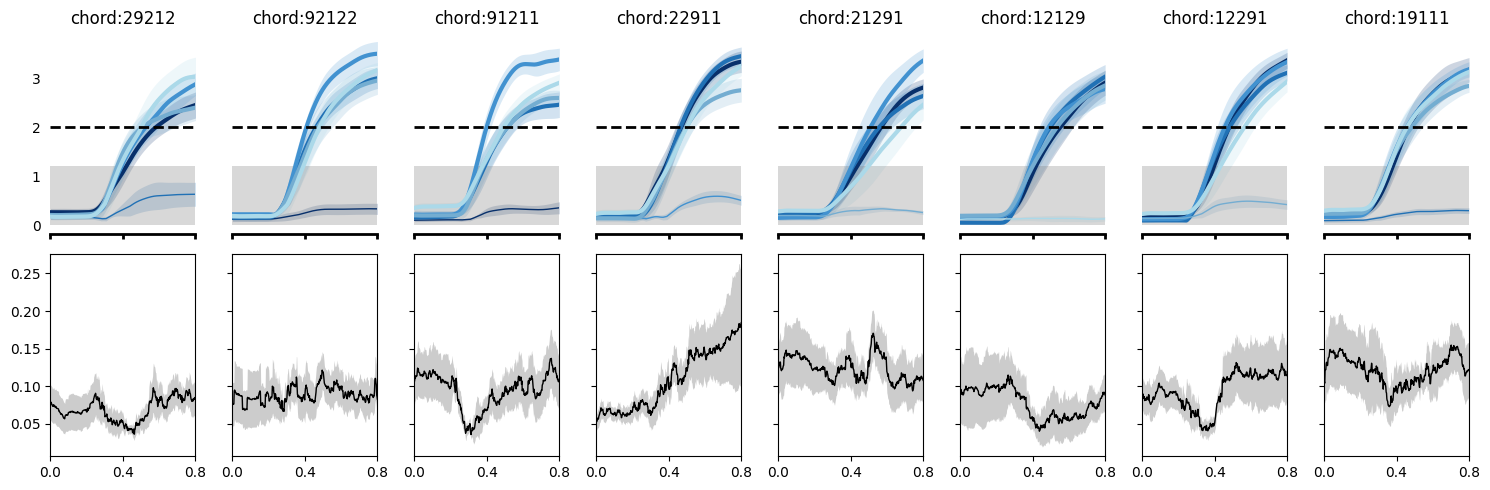

In [6]:
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests

experiment = 'efc2'

chord = 'trained'

force = main('FORCE:average', experiment, day='5', chord=chord)

with open(os.path.join(gl.baseDir, experiment, 'rank_corr_timepoints.pkl'), 'rb') as f:
    rank_corr_timeseries = pickle.load(f)
    
rho = np.stack(rank_corr_timeseries['rho'])
chordID_rho = np.stack(rank_corr_timeseries['chordID'])
chord_rho = np.stack(rank_corr_timeseries['chord'])

fig, axs = plt.subplots(2, len(force), sharex=True, sharey='row', figsize=(15, 5))

color = [
    (0.031, 0.188, 0.419),    # Dark Blue
    (0.129, 0.443, 0.710),    # Medium Blue
    (0.258, 0.573, 0.816),    # Sky Blue
    (0.454, 0.678, 0.819),    # Light Sky Blue
    (0.671, 0.851, 0.914)     # Pale Blue
         ] # Pale Violet]

for k, (key, f) in enumerate(force.items()):
    
    f = np.stack(f)
    f = np.abs(f)
    
    rho_tmp = rho[(chordID_rho == key) & (chord_rho == chord), :]
    _, pval_rho = ttest_1samp(rho_tmp, popmean=0, axis=0)
    rho_avg = rho_tmp.mean(axis=0)
    rho_err = rho_tmp.std(axis=0) / np.sqrt(rho_tmp.shape[0])
    
    tAx = np.linspace(0, .8, f.shape[-1])
    
    f_avg = f.mean(axis=0).squeeze().T
    f_err = f.std(axis=0).squeeze().T / np.sqrt(f.shape[1])
    
    axs[1, k].plot(tAx, rho_avg, color='k', linestyle='-', linewidth=1, label=r"spearman's \$rho$")
    axs[1, k].fill_between(tAx, rho_avg - rho_err, rho_avg + rho_err, color='k', lw=0, alpha=.2)
    
    for i, char in enumerate(str(key)):
        if char == '9':
            axs[0, k].plot(tAx, f_avg[:, i], color=color[i], lw=1, label=gl.channels['force'][i], ls='-')
        elif char== '1':
            axs[0, k].plot(tAx, f_avg[:, i], color=color[i], lw=3, label=gl.channels['force'][i], ls='-')
        else:
            axs[0, k].plot(tAx, f_avg[:, i], color=color[i], lw=3, label=gl.channels['force'][i], ls='-')
        axs[0, k].fill_between(tAx, f_avg[:, i] + f_err[:, i], f_avg[:, i] - f_err[:, i], lw=0, color=color[i], alpha=0.2)
        
    axs[0, k].set_title(f'chord:{key}', fontsize=fontsize)
    
    axs[0, k].axhspan(0, 1.2, color='grey', alpha=0.3, lw=0)
    
    axs[0, k].axhline(2, color='k', lw=2, ls='--')
    
    # axs[1].spines['bottom'].set_bounds(1, 5)
    axs[0, k].set_xlim([0, .8])
    axs[0, k].spines[['right', 'top', 'left']].set_visible(False)
    axs[0, k].spines[['bottom']].set_linewidth(2)
    axs[0, k].tick_params(axis='x', width=2)
    axs[0, k].tick_params(axis='y', width=0)
    axs[0, k].set_xticks([axs[0, k].get_xlim()[0], axs[0, k].get_xlim()[1] / 2, axs[0, k].get_xlim()[1]])
    # axs[k].set_xticklabels(axs[1].get_xticklabels(), fontsize=fontsize)
    axs[0, k].set_xlabel('')

# custom_handles = [Line2D([0], [0], color=color, label=gl.channels['force'][c], lw=3) for c, color in enumerate(color)] 
# axs[0].legend(handles=custom_handles, frameon=False, loc='upper left')
# axs[0].spines[['left']].set_visible(True)
# axs[0].spines[['left']].set_linewidth(2)
# axs[0].spines[['left']].set_bounds(0, 3.5)
# axs[0].tick_params(axis='y', width=2)
# 
# fig.supxlabel('time (s)', fontsize=fontsize)
# fig.supylabel('force (N)', fontsize=fontsize)
fig.tight_layout()

### **Derivative of force**

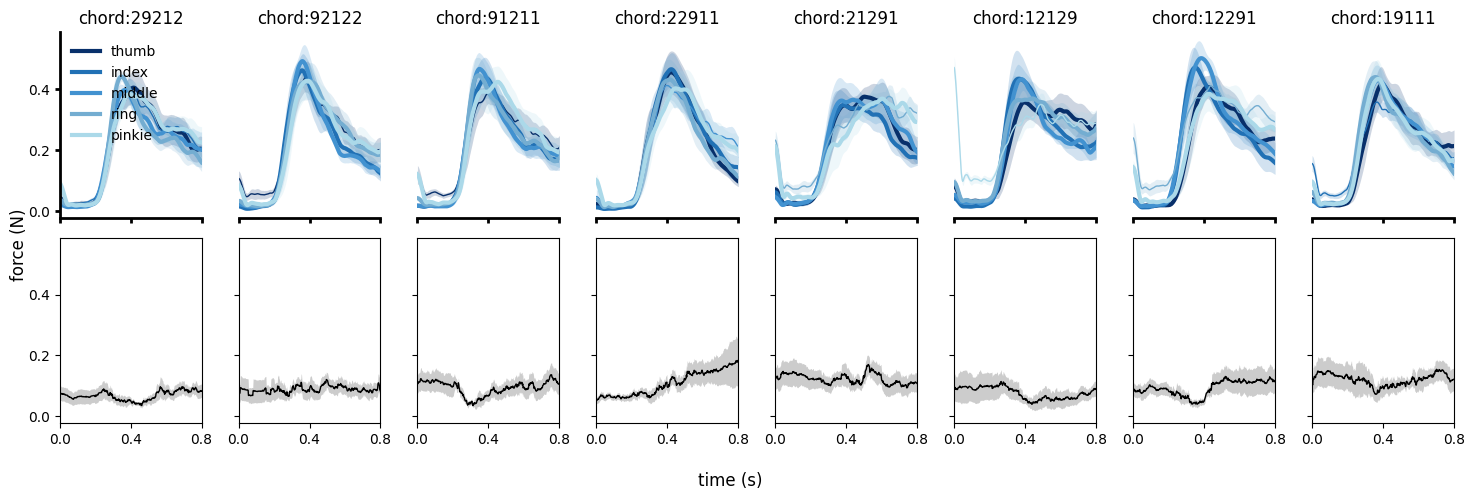

In [8]:
experiment = 'efc2'

chord = 'trained'

dforce, dforce_norm = main('FORCE:derivative', experiment, day='5', chord=chord)

with open(os.path.join(gl.baseDir, experiment, 'rank_corr_timepoints.pkl'), 'rb') as f:
    rank_corr_timeseries = pickle.load(f)
    
rho = np.stack(rank_corr_timeseries['rho'])
chordID_rho = np.stack(rank_corr_timeseries['chordID'])
chord_rho = np.stack(rank_corr_timeseries['chord'])

fig, axs = plt.subplots(2, len(dforce), sharex=True, sharey=True, figsize=(15, 5))

color = [(0.031, 0.188, 0.419),    # Dark Blue
    (0.129, 0.443, 0.710),    # Medium Blue
    (0.258, 0.573, 0.816),    # Sky Blue
    (0.454, 0.678, 0.819),    # Light Sky Blue
    (0.671, 0.851, 0.914)]     # Pale Blue

for k, (key, f) in enumerate(dforce_norm.items()):
    
    f = np.stack(f)
    f = np.abs(f)
    
    rho_tmp = rho[(chordID_rho == key) & (chord_rho == chord), :]
    # _, pval_rho = ttest_1samp(rho_tmp, popmean=0, axis=0)
    rho_avg = rho_tmp.mean(axis=0)
    rho_err = rho_tmp.std(axis=0) / np.sqrt(rho_tmp.shape[0])
    
    tAx = np.linspace(0, .8, f.shape[-1])
    
    f_avg = f.mean(axis=0).squeeze().T
    f_err = f.std(axis=0).squeeze().T / np.sqrt(f.shape[1])
    
    axs[1, k].plot(tAx, rho_avg, color='k', linestyle='-', linewidth=1, label=r"spearman's \$rho$")
    axs[1, k].fill_between(tAx, rho_avg - rho_err, rho_avg + rho_err, color='k', lw=0, alpha=.2)
    
    for i, char in enumerate(str(key)):
        if char == '9':
            axs[0, k].plot(tAx, f_avg[:, i], color=color[i], lw=1, label=gl.channels['force'][i], ls='-')
        elif char== '1':
            axs[0, k].plot(tAx, f_avg[:, i], color=color[i], lw=3, label=gl.channels['force'][i], ls='-')
        else:
            axs[0, k].plot(tAx, f_avg[:, i], color=color[i], lw=3, label=gl.channels['force'][i], ls='-')
        axs[0, k].fill_between(tAx, f_avg[:, i] + f_err[:, i], f_avg[:, i] - f_err[:, i], lw=0, color=color[i], alpha=0.2)
        
    axs[0, k].set_title(f'chord:{key}', fontsize=fontsize)
    
    # axs[1].spines['bottom'].set_bounds(1, 5)
    axs[0, k].set_xlim([0, .8])
    axs[0, k].spines[['right', 'top', 'left']].set_visible(False)
    axs[0, k].spines[['bottom']].set_linewidth(2)
    axs[0, k].tick_params(axis='x', width=2)
    axs[0, k].tick_params(axis='y', width=0)
    axs[0, k].set_xticks([axs[0, k].get_xlim()[0], axs[0, k].get_xlim()[1] / 2, axs[0, k].get_xlim()[1]])
    # axs[k].set_xticklabels(axs[1].get_xticklabels(), fontsize=fontsize)
    axs[0, k].set_xlabel('')

custom_handles = [Line2D([0], [0], color=color, label=gl.channels['force'][c], lw=3) for c, color in enumerate(color)] 
axs[0, 0].legend(handles=custom_handles, frameon=False, loc='upper left')
axs[0, 0].spines[['left']].set_visible(True)
axs[0, 0].spines[['left']].set_linewidth(2)
# axs[0].spines[['left']].set_bounds(0, 3.5)
axs[0, 0].tick_params(axis='y', width=2)

fig.supxlabel('time (s)', fontsize=fontsize)
fig.supylabel('force (N)', fontsize=fontsize)
fig.tight_layout()

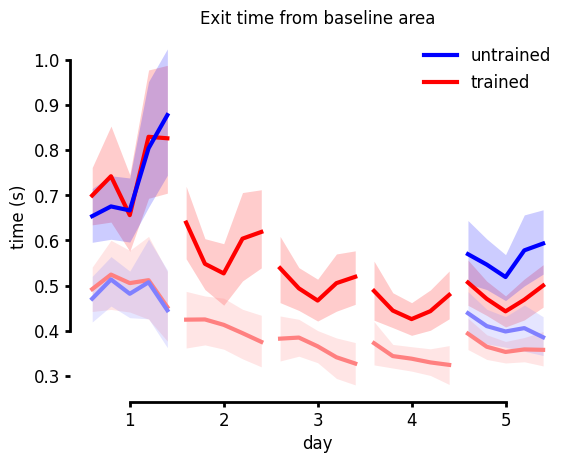

In [96]:
experiment = 'efc2'

metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.tsv'), sep='\t')
metrics = metrics[metrics['trialPoint']==1]
metrics_exit = pd.melt(metrics,
                        id_vars=['day', 'chord', 'chordID', 'participant_id'],
                        value_vars=['thumb_exit', 'index_exit', 'middle_exit', 'ring_exit', 'pinkie_exit'],
                        var_name='finger',
                        value_name='time')

# Second group of value_vars (e.g., another measurement like 'offset' for each finger)
metrics_onset = pd.melt(metrics,
                         id_vars=['day', 'chord', 'chordID', 'participant_id'],
                         value_vars=['thumb_onset', 'index_onset', 'middle_onset', 'ring_onset', 'pinkie_onset'],
                         var_name='finger',
                         value_name='time')
metrics_onset['timepoint'] = 'onset'
metrics_exit['timepoint'] = 'exit'

metrics = pd.concat([metrics_onset, metrics_exit], axis=0)
metrics['finger'] = metrics['finger'].str.replace('_exit', '', regex=False)
metrics['finger'] = metrics['finger'].str.replace('_onset', '', regex=False)

metrics = metrics.groupby(['chord', 'participant_id', 'day', 'finger', 'timepoint']).mean(numeric_only='True').reset_index()

custom_order_exit = ['thumb', 'index', 'middle', 'ring', 'pinkie']
metrics['finger'] = pd.Categorical(metrics['finger'], categories=custom_order_exit, ordered=True).codes
metrics['chordID'] = metrics['chordID'].astype(str)
jitter = 0.5 * (np.random.rand(len(metrics)) - 0.5)
metrics['finger_jittered'] = metrics['finger'] + jitter

offset = 5
metrics['offset'] = metrics['finger'] + metrics['day'] * offset

fig, axs = plt.subplots()

sns.lineplot(data=metrics[(metrics['chord']=='trained') & (metrics['timepoint']=='exit')], ax=axs, x='offset', y='time', hue='day', palette=['red'] * 5, err_kws={'linewidth': 0}, lw=3, legend=False)
sns.lineplot(data=metrics[(metrics['chord']=='untrained') & (metrics['timepoint']=='exit')], ax=axs, x='offset', y='time', hue='day', palette=['blue'] * 5, err_kws={'linewidth': 0}, lw=3, legend=False)
sns.lineplot(data=metrics[(metrics['chord']=='trained') & (metrics['timepoint']=='onset')], ax=axs, x='offset', y='time', hue='day', palette=[(1, .5, .5)] * 5, err_kws={'linewidth': 0}, lw=3, legend=False)
sns.lineplot(data=metrics[(metrics['chord']=='untrained') & (metrics['timepoint']=='onset')], ax=axs, x='offset', y='time', hue='day', palette=[(.5, .5, 1)] * 5, err_kws={'linewidth': 0}, lw=3, legend=False)

axs.set_xticks(np.linspace(7, 27, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], color='blue',  label='untrained', lw=3),
Line2D([0], [0], color='red',label='trained', lw=3),
]

axs.legend(handles=custom_handles, frameon=False, fontsize=fontsize, loc='upper right')

axs.set_ylabel('time (s)', fontsize=fontsize)

axs.set_xlabel('day', fontsize=fontsize)

# axs.set_xticks([0, 1, 2, 3, 4])
# axs.set_xticklabels(gl.channels['force'], rotation=45, ha='right', fontsize=fontsize)

axs.set_title(f'Exit time from baseline area')

decor(axs=axs, fontsize=fontsize,  ybounds=(.3, 1), xbounds=(7, 27), spines_width=2)


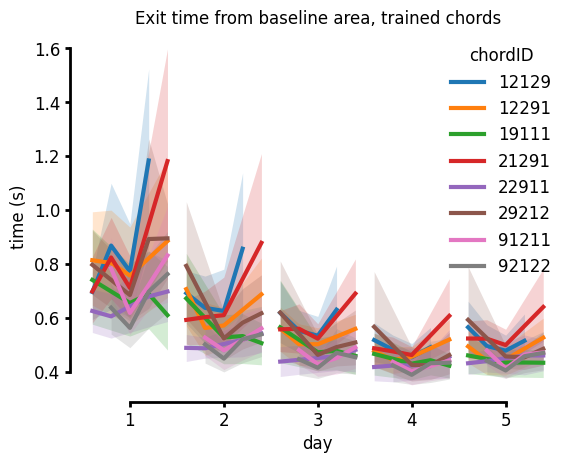

In [95]:
experiment = 'efc2'
chord = 'trained'

metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.tsv'), sep='\t')
metrics = metrics[metrics['chord']==chord]
metrics['chordID'] = metrics['chordID'].astype(str)
metrics = pd.melt(metrics, id_vars=['day', 'chord', 'chordID','participant_id'], value_vars=['thumb_exit',
            'index_exit',
            'middle_exit',
            'ring_exit',
            'pinkie_exit'], var_name='finger', value_name='onset')

metrics = metrics.groupby(['chordID', 'participant_id', 'day', 'finger']).mean(numeric_only='True').reset_index()

custom_order = ['thumb_exit', 'index_exit', 'middle_exit', 'ring_exit', 'pinkie_exit']
metrics['finger'] = pd.Categorical(metrics['finger'], categories=custom_order, ordered=True).codes
jitter = 0.5 * (np.random.rand(len(metrics)) - 0.5)
metrics['finger_jittered'] = metrics['finger'] + jitter

metrics['onset'] = metrics['onset']

offset = 5
metrics['offset'] = metrics['finger'] + metrics['day'] * offset

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

fig, axs = plt.subplots()

for ch, chordID in enumerate(metrics['chordID'].unique()):
    sns.lineplot(data=metrics[metrics['chordID']==chordID], ax=axs, x=metrics['offset'], y=metrics['onset'], hue='day', palette=[colors[ch]] * 5, err_kws={'linewidth': 0}, lw=3, legend=False)

axs.set_xticks(np.linspace(7, 27, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], color=colors[ch], label=chordID, lw=3) for ch, chordID in enumerate(metrics['chordID'].unique())
]

axs.legend(handles=custom_handles, frameon=False, fontsize=fontsize, loc='upper right', title='chordID', title_fontsize=fontsize)

axs.set_ylabel('time (s)', fontsize=fontsize)

axs.set_xlabel('day', fontsize=fontsize)

# axs.set_xticks([0, 1, 2, 3, 4])
# axs.set_xticklabels(gl.channels['force'], rotation=45, ha='right', fontsize=fontsize)

axs.set_title(f'Exit time from baseline area, {chord} chords')

decor(axs=axs, fontsize=fontsize, ybounds=(.4, 1.6), xbounds=(7, 27), spines_width=2)

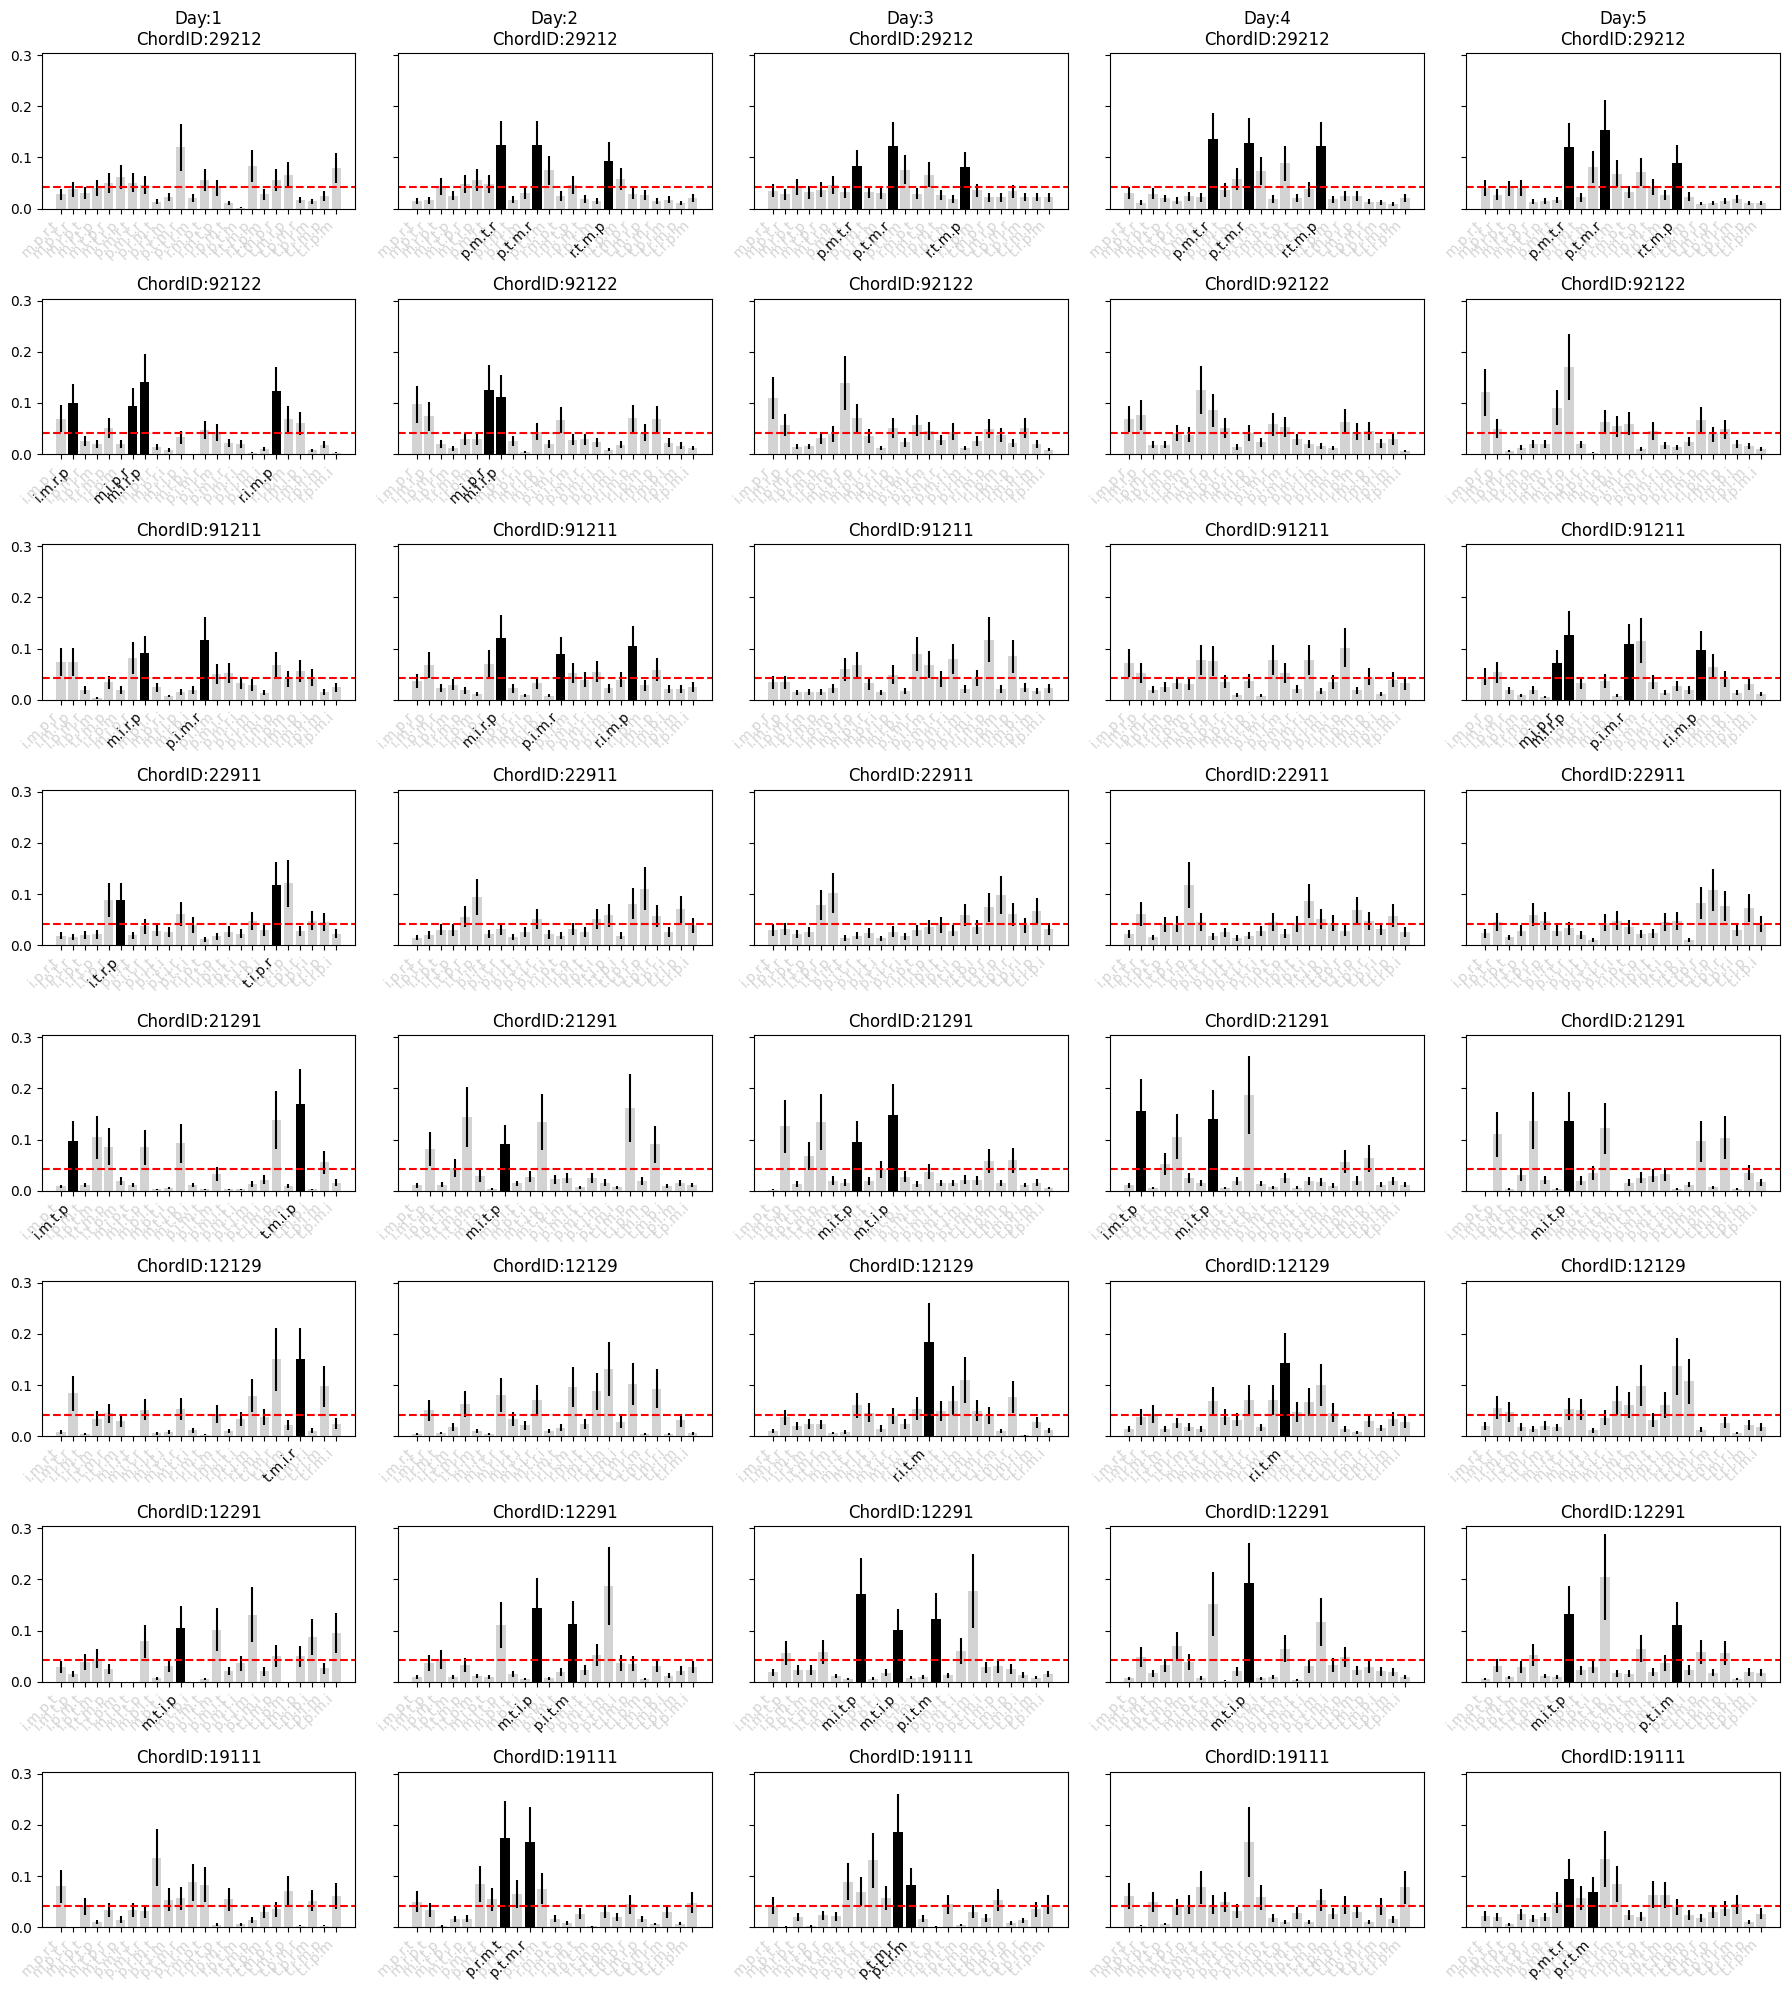

In [14]:
experiment = 'efc2'

# Load the dataset
order = pd.read_csv(os.path.join(gl.baseDir, experiment, 'order.tsv'), sep='\t')

# Chance level is 1/24 (approximately 0.0417)
chance_level = 1 / 24

# Set up subplots (adjust size for 8 chords and 5 days)
fig, axs = plt.subplots(8, 5, figsize=(18, 20), constrained_layout=True, sharey=True)

# Loop through each day and chordID to plot the bar charts
for d, day in enumerate(gl.days):
    for ch, chordID in enumerate(order['chordID'].unique()):

        # Filter data for the specific day and chordID
        order_tmp = order[(order['day'] == int(day)) & (order['chordID'] == chordID)]
        
        # Group by relevant columns to get the total and counts
        tot = order_tmp.groupby(['day', 'participant_id', 'chordID', 'chord'])['order'].count().unstack(fill_value=0)
        counts = order_tmp.groupby(['day', 'participant_id', 'chordID', 'chord'])['order'].value_counts().unstack(fill_value=0)
        
        order_keys = counts.columns
        
        tot_trained = tot[tot['trained'] > 0]['trained'].to_numpy()
        count_trained = counts[tot['trained'] > 0].to_numpy()

        # Calculate frequency trained as counts / totals
        freq_trained = count_trained / tot_trained.reshape((len(tot_trained), 1))
        
        t_stat, p_val = ttest_1samp(freq_trained, chance_level, axis=0, alternative='greater')

        # Filter based on significant p-values
        significant_freq = freq_trained[:, p_val < .05]
        significant_orders = order_keys[p_val < .05]
        
        bar_colors = ['black' if order in significant_orders else 'lightgrey' for order in order_keys]
        
        y = freq_trained.mean(axis=0)
        yerr = freq_trained.mean(axis=0) / np.sqrt(freq_trained.shape[0])
        axs[ch, d].bar(order_keys, y, yerr=yerr, color=bar_colors)
        
        # Set the x-tick labels with different colors
        xtick_colors = ['black' if order in significant_orders else 'lightgrey' for order in order_keys]
        axs[ch, d].set_xticks(range(len(order_keys)))
        axs[ch, d].set_xticklabels(order_keys, rotation=45, ha='right', color='black')
        
        # Apply the color to the individual tick labels
        for tick_label, color in zip(axs[ch, d].get_xticklabels(), xtick_colors):
            tick_label.set_color(color)
            
        axs[ch, d].axhline(y=chance_level, color='red', linestyle='--', label='Chance Level')
        
        if ch == 0:
            axs[ch, d].set_title(f"Day:{day}\nChordID:{chordID}")
        else:
            axs[ch, d].set_title(f"ChordID:{chordID}")

fig.tight_layout()


In [73]:
experiment = 'efc2'

# Load the dataset
order = pd.read_csv(os.path.join(gl.baseDir, experiment, 'order.tsv'), sep='\t')

# Chance level is 1/24 (approximately 0.0417)
chance_level = 1 / 24

data = []

for d, day in enumerate(gl.days):
    for p in order['participant_id'].unique():
        for ch, chordID in enumerate(order['chordID'].unique()):

            order_tmp = order[(order['day'] == int(day)) &
                              (order['chordID'] == chordID) &
                              (order['participant_id'] == p)]

            tot = order_tmp.groupby(['day', 'participant_id', 'chordID', 'chord'])['order'].count().unstack(fill_value=0)
            counts = order_tmp.groupby(['day','participant_id', 'chordID', 'chord'])['order'].value_counts().unstack(fill_value=0).to_numpy()

            chord = tot.columns[0]

            freq = counts / tot.to_numpy()

            row = {
                'day': day,
                'participant_id': p,
                'chordID': chordID,
                'chord': chord
            }
            for i in range(len(freq.squeeze())):
                row[f'freq_{i+1}'] = freq[i]

            data.append(row)

# Convert the collected data into a DataFrame
df_freq = pd.DataFrame(data)

pass

pydev debugger: Unable to find real location for: /var/folders/n4/rtkmbpdj3p5224zx_635jhkr0000gn/T/ipykernel_96011/843785138.py
pydev debugger: Unable to find real location for: /var/folders/n4/rtkmbpdj3p5224zx_635jhkr0000gn/T/ipykernel_96011/2850465468.py


KeyboardInterrupt: 

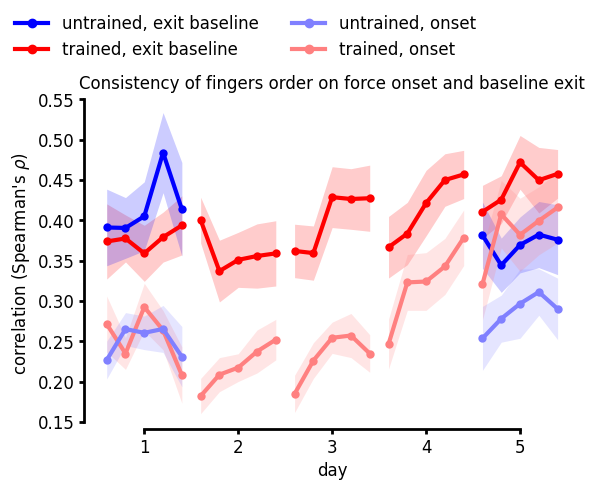

In [99]:
experiment = 'efc2'

rank_corr = pd.read_csv(os.path.join(gl.baseDir, experiment, 'rank_corr.tsv'), sep='\t')

rank_corr = rank_corr.groupby(['chord', 'participant_id', 'day', 'repetition']).mean(numeric_only='True').reset_index()

fig, axs = plt.subplots()

offset = 5
rank_corr['offset'] = rank_corr['repetition'] + rank_corr['day'] * offset

sns.lineplot(data=rank_corr[rank_corr['chord'] == 'trained'], ax=axs, x='offset', y='exit', hue='day', errorbar='se', lw=3,
             palette=['red'] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0}, legend=False)
sns.lineplot(data=rank_corr[rank_corr['chord'] == 'untrained'], ax=axs, x='offset', y='exit', hue='day', errorbar='se', lw=3, legend=False,
         palette=['blue'] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=rank_corr[rank_corr['chord'] == 'trained'], ax=axs, x='offset', y='onset', hue='day', errorbar='se', lw=3, palette=[(1, .5, .5)] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0}, legend=False)
sns.lineplot(data=rank_corr[rank_corr['chord'] == 'untrained'], ax=axs, x='offset', y='onset', hue='day', errorbar='se', lw=3, palette=[(.5, .5, 1)] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0}, legend=False)
axs.set_xticks(np.linspace(8, 28, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained, exit baseline', lw=3),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained, exit baseline', lw=3),
Line2D([0], [0], marker='o', color=(.5, .5, 1), markerfacecolor=(.5, .5, 1), label='untrained, onset', lw=3),
Line2D([0], [0], marker='o', color=(1, .5, .5), markerfacecolor=(1, .5, .5), label='trained, onset', lw=3)
            ]

fig.legend(handles=custom_handles, ncol=2, frameon=False, fontsize=12, loc='upper left')

axs.set_title("Consistency of fingers order on force onset and baseline exit", fontsize=fontsize)
axs.set_ylabel(r"correlation (Spearman's $\rho$)", fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)

decor(axs=axs, fontsize=fontsize, ybounds=(.15, .55), xbounds=(8, 28), spines_width=2)

fig.subplots_adjust(top=.8)

In [115]:
from scipy.stats import spearmanr

experiment = 'efc2'
metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.tsv'), sep='\t')
metrics = metrics[metrics['trialPoint']==1]
metrics_exit = pd.melt(metrics,
                        id_vars=['day', 'chord', 'chordID', 'participant_id'],
                        value_vars=['thumb_exit', 'index_exit', 'middle_exit', 'ring_exit', 'pinkie_exit'],
                        var_name='finger',
                        value_name='time')

corr = np.zeros((len(metrics['participant_id'].unique()),
                 len(metrics['chordID'].unique()),
                 len(metrics['day'].unique()),
                 len(metrics['day'].unique())))

for I, i in enumerate(metrics['day'].unique()):
    for J, j in enumerate(metrics['day'].unique()):
        for ch, chordID in enumerate(metrics['chordID'].unique()):

            keep = np.ones(5).astype(bool)
            for k, char in enumerate(str(chordID)):
                if char == '9':
                    keep[i] = False

            for P, p in enumerate(metrics['participant_id'].unique()):

                dayi = metrics[(metrics['participant_id'] == p) &
                               (metrics['chord'] == 'trained') &
                               (metrics['chordID'] == chordID) &
                                (metrics['day'] == i)][['thumb_onset_order',
                                                        'index_onset_order',
                                                        'middle_onset_order',
                                                        'ring_onset_order',
                                                        'pinkie_onset_order']].to_numpy()
                dayj = metrics[(metrics['participant_id'] == p) &
                               (metrics['chord'] == 'trained') &
                               (metrics['chordID'] == chordID) &
                                (metrics['day'] == j)][['thumb_onset_order',
                                                        'index_onset_order',
                                                        'middle_onset_order',
                                                        'ring_onset_order',
                                                        'pinkie_onset_order']].to_numpy()
                corr_tmp = np.array([spearmanr(dayi[row], dayj[col], nan_policy='omit').correlation for row in range(dayi.shape[0]) for col in range(dayj.shape[0])]).reshape(dayi.shape[0], dayj.shape[0])

                corr[P, ch, I, J] = np.triu(corr_tmp).mean()



KeyboardInterrupt: 

# **Variance decomposition on finger order**

Text(0.5, 0.98, 'Variance decomposition of finger order on baseline exit and target entry')

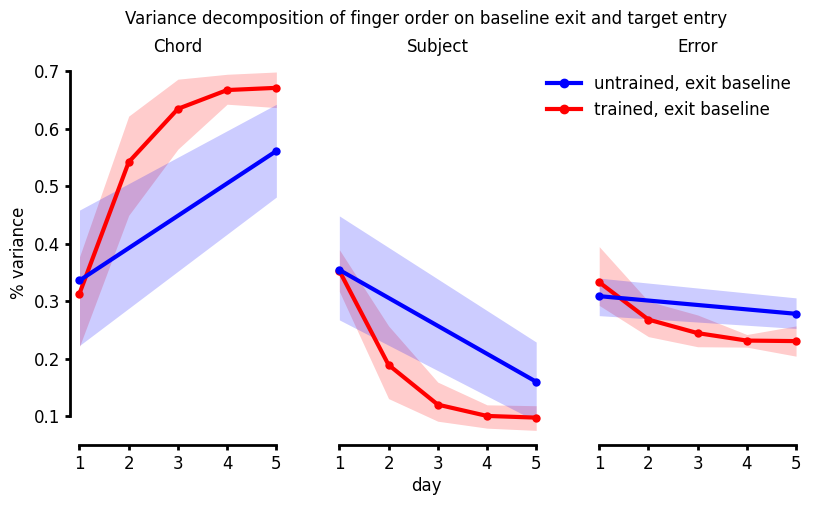

In [20]:
experiment = 'efc2'

var_dec_order = pd.read_csv(os.path.join(gl.baseDir, experiment, 'var_dec_order.tsv'), sep='\t')

var_dec_order = var_dec_order.groupby(['chord', 'day', 'chordID']).mean(numeric_only='True').reset_index()

fig, axs = plt.subplots(1, 3, figsize=(9.5, 5), sharey=True)

sns.lineplot(data=var_dec_order, ax=axs[0], y='v_g_exit', x='day', hue='chord', palette=['red', 'blue'], marker='o', markeredgecolor='none', 
             lw=3, err_kws={'linewidth': 0}, legend=False)
sns.lineplot(data=var_dec_order, ax=axs[1], y='v_s_exit', x='day', hue='chord', palette=['red', 'blue'], marker='o', markeredgecolor='none', 
             lw=3, err_kws={'linewidth': 0}, legend=False)
sns.lineplot(data=var_dec_order, ax=axs[2], y='v_e_exit', x='day', hue='chord', palette=['red', 'blue'], marker='o', markeredgecolor='none', 
             lw=3, err_kws={'linewidth': 0})

# sns.lineplot(data=var_dec_order, ax=axs[0], y='v_g_entry', x='day', hue='chord', palette=[(1, .5, .5), (.5, .5, 1)], marker='o', markeredgecolor='none', 
#              lw=3, err_kws={'linewidth': 0}, legend=False)
# sns.lineplot(data=var_dec_order, ax=axs[1], y='v_s_entry', x='day', hue='chord', palette=[(1, .5, .5), (.5, .5, 1)], marker='o', markeredgecolor='none', 
#              lw=3, err_kws={'linewidth': 0}, legend=False)
# sns.lineplot(data=var_dec_order, ax=axs[2], y='v_e_entry', x='day', hue='chord', palette=[(1, .5, .5), (.5, .5, 1)], marker='o', markeredgecolor='none', 
#              lw=3, err_kws={'linewidth': 0})

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained, exit baseline', lw=3),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained, exit baseline', lw=3),
# Line2D([0], [0], marker='o', color=(.5, .5, 1), markerfacecolor=(.5, .5, 1), label='untrained, enter target', lw=3),
# Line2D([0], [0], marker='o', color=(1, .5, .5), markerfacecolor=(1, .5, .5), label='trained, enter baseline', lw=3)
            ]

decor(axs=axs[0], fontsize=fontsize, ylim=(.05, .72), ybounds=(.1, .7), xbounds=(1, 5), spines_width=2)

axs[0].set_ylabel('% variance', fontsize=fontsize)
axs[0].set_xlabel('')
axs[0].set_title('Chord', fontsize=fontsize)

axs[1].spines['bottom'].set_bounds(1, 5)
axs[1].spines[['right', 'top', 'left']].set_visible(False)
axs[1].spines[['bottom']].set_linewidth(2)
axs[1].tick_params(axis='x', width=2)
axs[1].tick_params(axis='y', width=0)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=fontsize)
axs[1].set_title('Subject')
axs[1].set_xlabel('')

axs[2].spines['bottom'].set_bounds(1, 5)
axs[2].spines[['right', 'top', 'left']].set_visible(False)
axs[2].spines[['bottom']].set_linewidth(2)
axs[2].tick_params(axis='x', width=2)
axs[2].tick_params(axis='y', width=0)
axs[2].set_xticklabels(axs[2].get_xticklabels(), fontsize=fontsize)
axs[2].set_title('Error')
axs[2].set_xlabel('')

axs[2].legend(handles=custom_handles, frameon=False, fontsize=fontsize)

fig.supxlabel('day', fontsize=fontsize)
fig.suptitle('Variance decomposition of finger order on baseline exit and target entry', fontsize=fontsize)

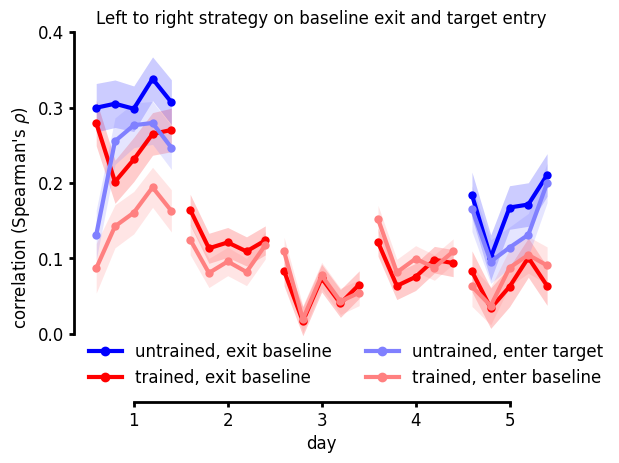

In [6]:
experiment = 'efc2'

slope = pd.read_csv(os.path.join(gl.baseDir, experiment, 'slope.tsv'), sep='\t')

fig, axs = plt.subplots()

offset = 5
slope['offset'] = slope['repetition'] + slope['day'] * offset

sns.lineplot(data=slope[slope['chord'] == 'trained'], ax=axs, x='offset', y='exit', hue='day', errorbar='se', lw=3,
             palette=['red'] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=slope[slope['chord'] == 'untrained'], ax=axs, x='offset', y='exit', hue='day', errorbar='se', lw=3,
         palette=['blue'] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=slope[slope['chord'] == 'trained'], ax=axs, x='offset', y='entry', hue='day', errorbar='se', lw=3, palette=[(1, .5, .5)] * 5, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=slope[slope['chord'] == 'untrained'], ax=axs, x='offset', y='entry', hue='day', errorbar='se', lw=3, palette=[(.5, .5, 1)] * 2, marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
axs.set_xticks(np.linspace(8, 28, 5))
axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

custom_handles = [
Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained, exit baseline', lw=3),
Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained, exit baseline', lw=3),
Line2D([0], [0], marker='o', color=(.5, .5, 1), markerfacecolor=(.5, .5, 1), label='untrained, enter target', lw=3),
Line2D([0], [0], marker='o', color=(1, .5, .5), markerfacecolor=(1, .5, .5), label='trained, enter baseline', lw=3)
            ]

axs.legend(handles=custom_handles, ncol=2, frameon=False, fontsize=fontsize, loc='lower left')

axs.set_title("Left to right strategy on baseline exit and target entry", fontsize=fontsize)
axs.set_ylabel(r"correlation (Spearman's $\rho$)", fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)

decor(axs=axs, fontsize=fontsize, ylim=(-.09, .4), ybounds=(0, .4), xbounds=(8, 28), spines_width=2)

# **Non-negative matrix factorization (NNMF)**

## **Dimensionality of chord and natural datasets**
Non-negative Matrix Factorization (NNMF) decomposes EMG activity patterns by decomposing the EMG activity patterns into a set of non-negative basis vectors and corresponding activation coefficients. Basis vector can be interpreted as governing muscle activation:

$$
\mathbf{V} \approx \mathbf{W} \mathbf{H}
$$

Where:
- $\mathbf{V} \in \mathbb{R}^{m \times n}_+$ is the original non-negative matrix (e.g., EMG signals).
- $\mathbf{W} \in \mathbb{R}^{m \times r}_+$ is the non-negative matrix of basis vectors (representing synergies).
- $\mathbf{H} \in \mathbb{R}^{r \times n}_+$ is the non-negative matrix of activation coefficients.


In [58]:
experiment = 'efc1'
participant_id = gl.participants[experiment]
chords, natural = main('EMG:nnmf', experiment, participant_id)

I applied NNMF separately to the chords and natural dataset. Below it is shown the median number of synergies required to explain >90% of variance in each dataset:

In [59]:
print(f'chords: {np.median(np.array(chords["k"]))}, R²: {np.array(chords["r2"]).mean()}\nnatural: {np.median(np.array(natural["k"]))}, R²: {np.array(natural["r2"]).mean()}')

chords: 6.0, R²: 0.9346538552157849
natural: 7.0, R²: 0.9259996924567753


## **Reconstruction of chord and natural datasets**
I reconstructed the chord dataset using the synergies extracted from the natural dataset, and the natural dataset using the chords. To reconstruct the chord dataset using natural synergies, I first calculated the non-negative matrix of activation coefficients $H_{natural\to chord}$ that minimizes the L2-norm:

$$
H_{natural\to chord}=\min_{\mathbf{H} \geq 0} \|\mathbf{V_{chord}} - \mathbf{W_{natural}} \mathbf{H_{natural\to chord}} \|_2^2
$$

Where:
- $\mathbf{V_{chord}} \in \mathbb{R}^{10 \times 68}_+$ is the original chord dataset (10 channels, 68 chords).
- $\mathbf{W_{natural}} \in \mathbb{R}^{10 \times r}_+$ are the $r$ synergies extracted from the natural dataset.
- $\mathbf{H_{natural\to chord}} \in \mathbb{R}^{r \times 68}_+$ is a non-negative matrix of activation coefficients.

Similarly, to reconstruct the natural dataset from chords, I first found $H_{natural\to chord}$ such that:

$$
H_{natural\to chord} = \min_{\mathbf{H} \geq 0} \|\mathbf{V_{natural}} - \mathbf{V_{chord}} \mathbf{H_{chord\to natural}} \|_2^2
$$

Where:
- $\mathbf{V_{natural}} \in \mathbb{R}^{10 \times n}_+$ is the original natural dataset (10 channels, n timepoints).
- $\mathbf{V_{chord}} \in \mathbb{R}^{10 \times 68}_+$ is the original chord dataset.
- $\mathbf{H_{chord\to natural}} \in \mathbb{R}^{r \times 68}_+$ is a non-negative matrix of activation coefficients.

Then, I calculated:

$$
\mathbf{\hat{V_{chord}}} = \mathbf{W_{natural}} \mathbf{H_{natural\to chord}}
$$

And:

$$
\mathbf{\hat{V_{natural}}} = \mathbf{V_{chord}} \mathbf{H_{chord\to natural}}
$$

The figure below shows the $R^2$ as an index of the goodness of reconstruction. $R^2$ may be different between two reconstruction due to the different number of chords/syenrgies empolyed. To account for this, I also performed the two reconstruction using shuffled versions of $V_{chord}$ and $V_{natural}$ (dashed line in the figure). Finally, because EMG data are affected by measurament noise, perfect reconstruction is hardly achievable. To estimate the noise ceiling in the chord dataset, I first calculate the average pattern of EMG activation for each chord across participant $V_{chordAvg}$, then I calculated:

$$
B=\min_{\mathbf{H} \geq 0} \|\mathbf{V_{chordAvg}} - \mathbf{V_{chordParticipant}} \mathbf{B} \|_2^2
$$

Where $V_{chordParticipant}$ is the chord datatset recorded in a single participant. I then obtained:

$$
\mathbf{\hat{V_{chordAvg}}} = \mathbf{V_{chordParticipant}} \mathbf{B}
$$

And calculated $R^2$ in each participant. $R^2$ averaged across participant was taken as a measure of noise ceiling. In the natural dataset, each participant's data are divided into several partitions. Because during the task participants were freely exploring the natural workspace, estimating the noise ceiling cannot simply be done by predicting one partition using another one, or using the average activity in each partition. Therefore, to estimate the noise ceiling, I extracted the motor synergies from a given partitition using NNMF. Then, I estimated the activation coefficient for each synergy in another partition using the same non-negative optimization approach described above. Finally, I estimated the EMG pattern in the second partition and calculated $R^2$ to assess the goodness of reconstruction. The noise ceiling was estimate by averaging $R^2$ across partitions and participants.

{'pval_chord2nat_shuffle': np.float64(0.0006650073706584202), 'pval_nat2chord_shuffle': np.float64(0.11466574407402562), 'pval_chord2nat_ceiling': np.float64(0.04213126244827308), 'pval_nat2chord_ceiling': np.float64(0.9999131629881949)}


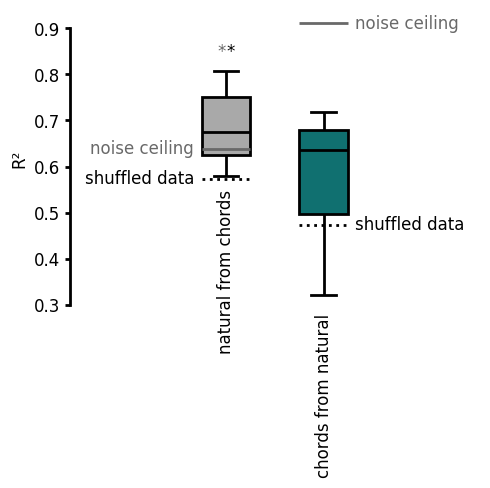

In [64]:
experiment = 'efc1'

width = .5

fig, axs = plt.subplots(figsize=(5, 5))
fig, axs, pval = main('PLOT:recon_emg', experiment, fig=fig, axs=axs, width=width, linewidth=2,
                            linecolor='k', showfliers=False, palette=['darkgrey', 'teal'])

with open(os.path.join(gl.baseDir, experiment, 'recon_emg.pkl'), 'rb') as file:
    recon_dict = pickle.load(file)

df = pd.DataFrame({key: recon_dict[key] for key in ['participant_id', 'r2_chord2nat_shuffle',  'r2_nat2chord_shuffle']})
df_shuffle = df.groupby('participant_id')[['r2_chord2nat_shuffle', 'r2_nat2chord_shuffle']].mean().reset_index()

pos = axs.get_xticks()

shuffle_chord = df_shuffle['r2_chord2nat_shuffle']
axs.hlines(y=shuffle_chord.mean(), xmin=pos[0] - width / 2, xmax=pos[0] + width / 2, color='k', ls=':', lw=2)
axs.hlines(y=np.array(recon_dict['nc_natural']).mean(), xmin=pos[0] - width / 2, xmax=pos[0] + width / 2,
           color='dimgrey', ls='-', lw=2)
shuffle_nat = df_shuffle['r2_nat2chord_shuffle']
axs.hlines(y=shuffle_nat.mean(), xmin=pos[1] - width / 2, xmax=pos[1] + width / 2, color='k', ls=':', lw=2)
axs.hlines(y=np.array(recon_dict['nc_chords']).mean(), xmin=pos[1] - width / 2, xmax=pos[1] + width / 2,
           color='dimgrey', ls='-', lw=2)

axs.text(axs.get_xlim()[1], shuffle_nat.mean(), 'shuffled data', va='center', ha='left', color='k', fontsize=fontsize)
axs.text(axs.get_xlim()[1], np.array(recon_dict['nc_chords']).mean(), 'noise ceiling', va='center', ha='left',
         color='dimgrey', fontsize=fontsize)
axs.text(axs.get_xlim()[0], shuffle_chord.mean(), 'shuffled data', va='center', ha='right', color='k', fontsize=fontsize)
axs.text(axs.get_xlim()[0], np.array(recon_dict['nc_natural']).mean(), 'noise ceiling', va='center', ha='right',
         color='dimgrey', fontsize=fontsize)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=fontsize)
axs.set_ylabel('R²', fontsize=fontsize)

axs.set_xticks([])
axs.set_xlabel('')

axs.set_xlim([-1.6, 2.6])

print(pval)
axs.text(0, .85, '*', color='dimgrey', va='center', ha='right', fontsize=fontsize)
axs.text(0, .85, '*', color='k', va='center', ha='left', fontsize=fontsize)

axs.spines[['right', 'bottom', 'top']].set_visible(False)
axs.spines['left'].set_linewidth(2)
axs.tick_params(axis='y', width=2)  # Change y-tick width

axs.text(0, .55, 'natural from chords', va='top', ha='center', color='k', fontsize=fontsize, rotation=90)
axs.text(1, .28, 'chords from natural', va='top', ha='center', color='k', fontsize=fontsize, rotation=90)

axs.spines['left'].set_bounds(.3, .9)

fig.tight_layout()

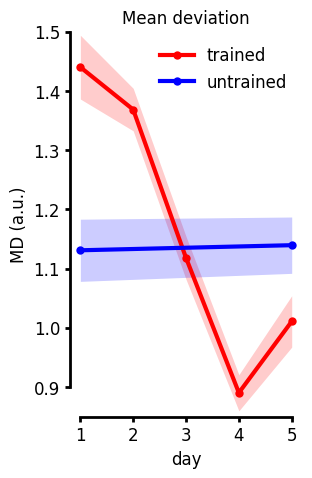

In [92]:
experiment = 'efc3'

metrics = pd.read_csv(os.path.join(gl.baseDir, experiment, 'metrics.tsv'), sep='\t')

fig, axs = plt.subplots(figsize=(3, 5))

sns.lineplot(data=metrics, ax=axs, x='day', y='MD', hue='chord', errorbar='se',
             palette=['red', 'blue'], marker='o', markeredgewidth=0, lw=3, err_kws={'linewidth': 0})
# axs.set_xticks(np.linspace(8, 28, 5))
# axs.set_xticklabels(np.linspace(1, 5, 5, dtype=int))

axs.legend(loc='upper right', ncol=1, frameon=False, fontsize=fontsize)

axs.set_title('Mean deviation', fontsize=fontsize)
axs.set_ylabel('MD (a.u.)', fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)

decor(axs=axs, fontsize=fontsize, xlim=(1, 5), ylim=(.85, 1.5), ybounds=(.9, 1.5), xbounds=(1, 5), spines_width=2)

Nat vs MEP correlation, Pearson's R: 0.473, p-value: 0.000


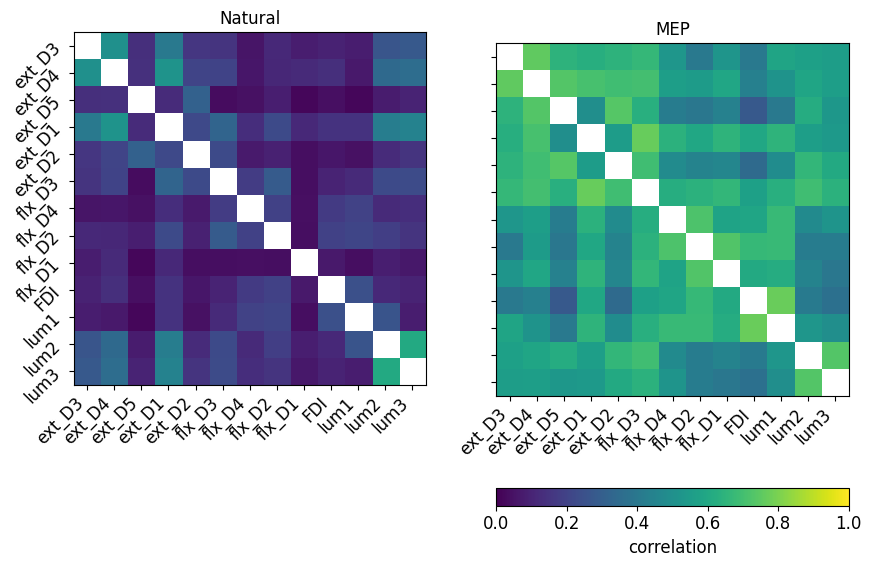

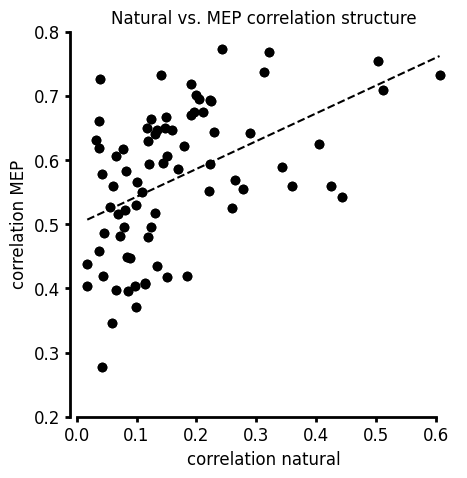

In [3]:
from scipy.stats import pearsonr

experiment = 'efc3'
participant_id = 'subj100'

natural = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emgNatural', participant_id, 'Natural_patterns.tsv'), sep='\t')
natural.drop(natural.columns[0], axis=1, inplace=True)

cols = natural.columns

mepAmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'emgTMS', participant_id, 'mepAmp.tsv'), sep='\t')
mepAmp.drop(mepAmp.columns[0], axis=1, inplace=True)

corrNat = natural.corr(method='pearson').to_numpy()
corrMEP = mepAmp.corr(method='pearson').to_numpy()
np.fill_diagonal(corrNat, np.nan)
np.fill_diagonal(corrMEP, np.nan)

fig, axs = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(10, 8))

axs[0].imshow(corrNat, vmin=0, vmax=1)
axs[0].set_title('Natural', fontsize=fontsize,)
axs[0].set_xticks(np.linspace(0, corrNat.shape[0] - 1, corrNat.shape[0]))
axs[0].set_yticks(np.linspace(0, corrNat.shape[0] - 1, corrNat.shape[0]))
axs[0].set_xticklabels(cols, rotation=45, fontsize=fontsize, ha='right')
axs[0].set_yticklabels(cols, rotation=45, fontsize=fontsize,ha='right')

cax = axs[1].imshow(corrMEP, vmin=0, vmax=1)
axs[1].set_title('MEP', fontsize=fontsize,)
axs[1].set_xticks(np.linspace(0, corrNat.shape[0] - 1, corrNat.shape[0]))
axs[1].set_xticklabels(cols, rotation=45, fontsize=fontsize,ha='right')

cbar = fig.colorbar(cax, ax=axs[1], orientation='horizontal', location='bottom', fraction=0.046)
cbar.set_label('correlation', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

# correlation between Nat and MEP
corrNat = corrNat.flatten()
corrMEP = corrMEP.flatten()
valid = np.isfinite(corrNat) & np.isfinite(corrMEP)
corrNat = corrNat[valid]
corrMEP = corrMEP[valid]

r, pval = pearsonr(corrNat, corrMEP)

print(f"Nat vs MEP correlation, Pearson's R: {r:.3f}, p-value: {pval:.3f}")

m, q = np.polyfit(corrNat, corrMEP, 1)

xhat = np.linspace(corrNat.min(), corrNat.max(), corrNat.size)
yhat = m * xhat + q

fig, axs = plt.subplots(figsize=(5, 5))

axs.scatter(corrNat, corrMEP, color='k')
axs.plot(xhat, yhat, color='k', ls='--')

axs.set_xlabel('correlation natural', fontsize=fontsize)
axs.set_ylabel('correlation MEP', fontsize=fontsize)

axs.set_title('Natural vs. MEP correlation structure')

decor(axs=axs, fontsize=fontsize, ylim=(.2, .8), xlim=(0, .6), spines_width=2, xbounds=(0, .6), ybounds=(.2, .8))


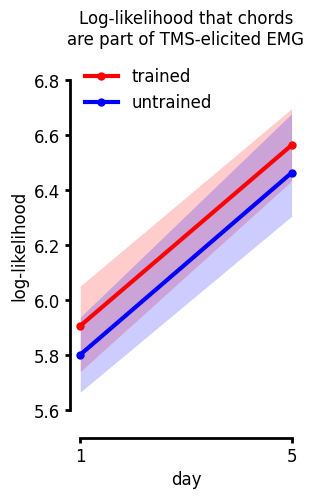

In [87]:
experiment = 'efc3'

log_prob = pd.read_csv(os.path.join(gl.baseDir, experiment, 'log_prob.tsv'), sep='\t')
log_prob['chordID'] = pd.Categorical(log_prob['chordID'])

fig, axs = plt.subplots(figsize=(3, 5))

sns.lineplot(log_prob, ax=axs, y='log_slope', x='day', hue='chord', palette=['red', 'blue'], marker='o', lw=3, markeredgecolor='none',err_kws={'lw': 0})

axs.legend(frameon=False, fontsize=fontsize)

axs.set_ylabel('log-likelihood', fontsize=fontsize)
axs.set_xlabel('day', fontsize=fontsize)

axs.set_xticks([1, 5])

axs.set_title('Log-likelihood that chords\nare part of TMS-elicited EMG', fontsize=fontsize)

decor(axs=axs, fontsize=fontsize, ylim=(5.5, 6.9), xlim=(1., 5.), spines_width=2, xbounds=(1, 5), ybounds=(5.6, 6.8))